In [1]:
require('ggplot2')
require('reshape')

Loading required package: ggplot2
Loading required package: reshape


In [2]:
trials <- 100

In [3]:
epsilons <- seq(0, 0.2, 0.01)
epsilons

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

In [4]:
rcontnorm <- function(n=1, mean=0, sd=1, eps=0.1, sdc=10) {
    # Generate random numbers distributed according to a contaminated normal distribution.
    #
    # Arguments:
    #        n: number of observations.
    #     mean: vector of means.
    #       sd: vector of standard deviations for base.
    #      eps: factor of contamination.
    #      sdc: vector of standard deviations for contamination.
    t_choice <- rbinom(n, 1, 1-eps)
    t_norm <- rnorm(n)
    t_contam <- rnorm(n, sd=sdc)
    return (t_choice * t_norm + (1-t_choice) * t_contam)
}

In [15]:
df <- data.frame(trial=1:trials, sapply(epsilons, rcontnorm, n=trials, mean=0, sd=1, sdc=10))
colnames(df)[2:(length(epsilons)+1)] <- epsilons
melt_df <- melt(df, id.vars='trial', variable_name='eps')

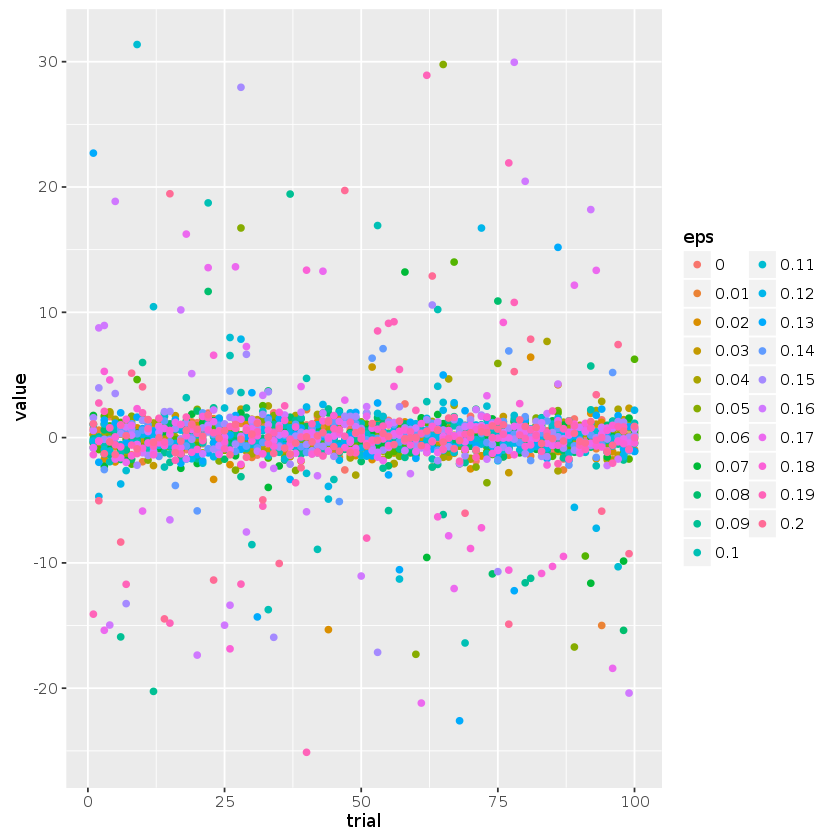

In [16]:
ggplot(melt_df, aes(trial, value, color=eps)) + geom_point()

In [20]:
colMeans(df)

trial           0        0.01        0.02        0.03        0.04 
50.50000000  0.22135730 -0.13260313 -0.26112804  0.04782955  0.13957431 
       0.05        0.06        0.07        0.08        0.09         0.1 
 0.10391840  0.22603375 -0.18769623  0.04942689 -0.56710235  0.18340609 
       0.11        0.12        0.13        0.14        0.15        0.16 
 0.24654591  0.11073912 -0.11226083  0.19834989  0.16562019  0.18679134 
       0.17        0.18        0.19         0.2 
 0.21088557 -0.41997403  0.16431028 -0.00697697